# 3. Clustering

In [1]:
# DA TOGLIERE / INTEGRARE

# Run this code to make Jupyter print every
# printable statement and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# To visualize the data
import matplotlib.pyplot as plt

# Generic libraries
import seaborn as sns
import pandas as pd
import numpy as np

# Regression models
import sklearn
import scipy
from scipy.stats import *
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV #split the data into training and test
from sklearn.linear_model import LinearRegression #linear regression
from sklearn.preprocessing import PolynomialFeatures #for polynomial regression
from sklearn.metrics import r2_score, mean_squared_error

# 5-folds crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, classification_report
from sklearn.pipeline import Pipeline

#classification
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
# Libraries specific for clustering -> ALCUNE COSE POTREBBERO ESSERE DA TOGLIERE
import matplotlib.colors as mcolors
import random
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc


In [3]:
# DA SISTEMARE CON L'ALTRO
training_set = pd.read_csv("NOTEBOOK/training_set_complete.csv")
test_set = pd.read_csv("NOTEBOOK/test_set_complete.csv")
#training_set = training_set.drop(columns=['Unnamed: 0'])
#test_set = test_set.drop(columns=['Unnamed: 0'])
training_set['Revenue'] = training_set['Revenue'].astype(int)
test_set['Revenue'] = test_set['Revenue'].astype(int)
#training_set['Revenue'].value_counts()
#test_set['Revenue'].value_counts()
categorical_features = ['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']
#training_set[categorical_features] = training_set[categorical_features].astype('category')
#test_set[categorical_features] = test_set[categorical_features].astype('category')

In [4]:
X_train_full = training_set.drop(columns=['Revenue'])
X_test_full = test_set.drop(columns=['Revenue'])
y_train = training_set['Revenue']
y_test = test_set['Revenue']

In [5]:
# FACCIAMO QUESTO STEP PER EVITARE PROBLEMI DI CONVERGENZA NEL MODELLO
from sklearn.preprocessing import StandardScaler

# Assuming you have your feature data X
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical_features = ['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 
                        'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_6', 'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5',
                        'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 
                        'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 
                        'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 
                        'TrafficType_15', 'TrafficType_19', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(X_train_full[numeric_features]))
test_scaled = pd.DataFrame(scaler.fit_transform(X_test_full[numeric_features]))
train_scaled.columns = X_train_full[numeric_features].columns
test_scaled.columns = X_test_full[numeric_features].columns
X_train_scaled = pd.concat([train_scaled,X_train_full[categorical_features]],axis=1)
X_test_scaled = pd.concat([test_scaled,X_test_full[categorical_features]],axis=1)

In [6]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0.0075  # Soglia di varianza desiderata
variance_selector = VarianceThreshold(threshold=threshold)

# Applicazione della selezione della varianza sul dataset

X_train_scaled = X_train_scaled.loc[:, variance_selector.fit(X_train_scaled).get_support()]
columns_remaining = X_train_scaled.columns.tolist()

X_test_scaled = X_test_scaled[columns_remaining]
print(X_train_scaled.columns.tolist())
len(columns_remaining)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_8', 'Browser_10', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_8', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']


56

## Setting the constant parameters

In [7]:
n_clusters = 2
element_distance_metric = 'euclidean'
linkage = 'ward'

## Functions to evaluate clustering performances

### Crosscorrelation index

In [8]:
# similarity matrix
def plot_similarity_matrix(X,y,metric=element_distance_metric):
    sim = similarity_mat(X, metric=element_distance_metric)
    plot_sorted_mat(sim, y)

# incidence matrix
def plot_incidence_matrix(y_pred):
    inc = incidence_mat(y_predict)
    plot_sorted_mat(inc, y_predict)

### External Indexes

In [9]:
def get_count_nk(cluster_labels,k):
    return np.count_nonzero(cluster_labels == k)

def get_count_nj(class_labels,j):
    return np.count_nonzero(class_labels == j)

def get_count_nkj(cluster_labels,class_labels,k,j):
    return len(np.intersect1d(np.where(cluster_labels == k)[0], np.where(class_labels == j)[0]))

def get_precision(cluster_labels, class_labels, k, j):
    return get_count_nkj(cluster_labels,class_labels,k,j)/get_count_nk(cluster_labels,k)

def get_recall(cluster_labels, class_labels, k, j):
    return get_count_nkj(cluster_labels,class_labels,k,j)/get_count_nj(class_labels,j)

## da rivedere
def get_cluster_purity(cluster_labels,class_labels,k):
    precisions = []
    labels_in_cluster_k = np.unique(cluster_labels)
    for label in labels_in_cluster_k:
        precisions.append(get_precision(cluster_labels,class_labels,k,label))
    return max(precisions)

## da rivedere
def get_total_purity(cluster_labels,class_labels):
    purities = []
    labels_in_cluster_k = np.unique(cluster_labels)

    for cluster in labels_in_cluster_k:
        purities.append(get_cluster_purity(cluster_labels,class_labels,cluster)*(get_count_nk(cluster_labels,cluster)/len(cluster_labels)))
    return sum(purities)

def get_accuracy(cluster_labels,class_labels):
    return sum(cluster_labels == class_labels)/len(class_labels)

In [10]:
def get_cluster_metrics(cluster_labels,class_labels,model_name):
    
    accuracy = get_accuracy(cluster_labels,class_labels)
    
    cluster_label_unique = np.sort(np.unique(cluster_labels))
    class_label_unique = np.sort(np.unique(class_labels))
    
    precisions = [] # ordine: 00,01,10,11 (prima cifra: cluster, seconda cifra: classe)
    recalls = [] # ordine: 00,01,10,11 (prima cifra: cluster, seconda cifra: classe)
    
    purities = []
    
    for k in cluster_label_unique:
        for j in class_label_unique:
            precisions.append(get_precision(cluster_labels,class_labels,k,j))
        purities.append(get_cluster_purity(cluster_labels,class_labels,k))
        
    for j in class_label_unique:
        for k in cluster_label_unique:
            recalls.append(get_recall(cluster_labels,class_labels,k,j))
    
    tot_purity = get_total_purity(cluster_labels,class_labels)
    
    jaccard = sklearn.metrics.jaccard_score(class_labels, cluster_labels)
    
    data = {
        'Accuracy':[accuracy],
        'p_00':[precisions[0]],
        'p_01':[precisions[1]],
        'p_10':[precisions[2]],
        'p_11':[precisions[3]],
        'r_00':[recalls[0]],
        'r_01':[recalls[1]],
        'r_10':[recalls[2]],
        'r_11':[recalls[3]],
        'p_0':[purities[0]],
        'p_1':[purities[1]],
        'tot_purity':[tot_purity],
        'jaccard':[jaccard],
        
    }
    data = pd.DataFrame(data)
    data.rename(index={0: model_name}, inplace=True)
    return data
    #return accuracy,precisions,recalls,purities,tot_purity,jaccard
    

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Esempio dati di clustering
# Sostituisci queste matrici con i tuoi dati di clustering
# labels_true rappresenta le vere etichette, mentre labels_pred sono le etichette predette dall'algoritmo di clustering
def plot_roc_curve_clustering(labels_true,labels_pred,ax):

    # Converti le etichette predette in etichette binarie (0, 1)
    labels_binary = np.where(labels_pred == 1, 1, 0)

    # Calcola la curva ROC
    fpr, tpr, _ = roc_curve(labels_true, labels_binary)

    # Calcola l'area sotto la curva ROC (AUC)
    roc_auc = auc(fpr, tpr)

    # Disegna la curva ROC
    ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax.legend(loc='lower right')
    ax.grid(True)


In [12]:
def plot3d(X, labels,ax):
    # Set matplotlib to generate static images
    # %matplotlib inline
    # Set matplotlib as interactive
    #%matplotlib notebook
    # This import is required to set up the 3D environment
    from mpl_toolkits.mplot3d import Axes3D
    
    pca = PCA(n_components=3)
    # We consire images as simple vectors of 64 features, reshape using the X.shape[0] information
    X = X.reshape(X.shape[0], -1)
    # Reduce features dimensionality, just for visualization
    # purpuses
    X = pca.fit_transform(X)
    
    unique_labels = np.unique(labels)
    # Convert negative values (outliers) into positive
    labels = labels.copy()
    labels += np.abs(unique_labels.min())
    nlabels = len(unique_labels)
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(111, projection='3d')
    # Define color mappings
    col = ('tab10' if nlabels <= 10 else 
          ('tab20' if nlabels <= 20 else
           'hsv'))
    cmap = plt.cm.get_cmap(col)
    smap = cm.ScalarMappable(
              norm=mcolors.Normalize(unique_labels.min(), unique_labels.max()+1), 
              cmap=cmap)
    # Plot the 3d coordinates (similar to standard scatter plots, we just
    # need to provide an additional z coordinate!)
    ax.scatter(xs=X[:, 0], ys=X[:, 1], zs=X[:, 2], c=labels, cmap=cmap)
    ax.set_title('Clustering results')
    # Plot a color bar on the right
    #plt.colorbar(mappable=smap, label='digit label', ticks=range(nlabels)) 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


def assign_color_label(class_labels, cluster_labels):
    # Combina le etichette di classe e di cluster in un'unica etichetta univoca
    unique_class_labels = np.unique(class_labels)
    unique_cluster_labels = np.unique(cluster_labels)
    combined_labels = [f'Class {c}_Cluster {cl}' for c in unique_class_labels for cl in unique_cluster_labels]
    color_labels = np.array([f'Class {c}_Cluster {cl}' for c, cl in zip(class_labels, cluster_labels)])

    # Crea una colormap personalizzata con 4 colori
    n_labels = len(combined_labels)
    col = ('tab10' if n_labels <= 10 else 
           ('tab20' if n_labels <= 20 else
           'hsv'))
    cmap = plt.cm.get_cmap(col, n_labels)

    # Crea un dizionario di mappatura delle etichette univoche ai colori
    color_map = dict(zip(combined_labels, cmap.colors))

    # Mappa le etichette di colore
    color_labels_mapped = [color_map[label] for label in color_labels]

    return color_labels_mapped

def plot3d_class_and_cluster_labels(X, class_labels, cluster_labels,ax):
    # Set matplotlib to generate static images
    #%matplotlib inline
    # Set matplotlib as interactive
    #%matplotlib notebook
    # This import is required to set up the 3D environment
    from mpl_toolkits.mplot3d import Axes3D
    
    pca = PCA(n_components=3)
    # We consider images as simple vectors of 64 features, reshape using the X.shape[0] information
    X = X.reshape(X.shape[0], -1)
    # Reduce features dimensionality, just for visualization
    # purposes
    X = pca.fit_transform(X)
    
    color_labels_mapped = assign_color_label(class_labels, cluster_labels)
    
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(111, projection='3d')

    # Crea un oggetto ScalarMappable per mappare le etichette di colore
    smap = cm.ScalarMappable(cmap=cm.colors.ListedColormap(color_labels_mapped))

    # Plot the 3d coordinates (similar to standard scatter plots, we just
    # need to provide an additional z coordinate!) and use the ScalarMappable for coloring
    sc = ax.scatter(xs=X[:, 0], ys=X[:, 1], zs=X[:, 2], c=color_labels_mapped, cmap=smap.cmap)
    
    # Imposta il mappaggio corretto dell'intervallo di valori per il ScalarMappable
    smap.set_array(color_labels_mapped)

    # Plot a color bar on the right
    #plt.colorbar(smap, label='Combined Label', ticks=np.arange(len(color_labels_mapped)))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    #plt.show()
    ax.set_title('Cluster vs classes')
    

# Esempio di utilizzo
# Supponiamo di avere i dati X, le etichette di classe class_labels e le etichette di cluster cluster_labels
# plot3d(X, class_labels, cluster_labels)

In [14]:
#plt.figure(figsize=(18, 6))
def purity_vs_jaccard_plot(X,cluster_labels,class_labels):
    plt.subplots(nrows=1, ncols=2, figsize=(15, 6), subplot_kw={'projection': '3d'})

    # Primo subplot
    ax1 = plt.subplot(1, 2, 1)
    plot3d(X, cluster_labels, ax1)

    # Secondo subplot
    ax2 = plt.subplot(1,2,2)
    plot3d_class_and_cluster_labels(X, class_labels, cluster_labels,ax2)

    # Imposta i grafici come quadrati
    #plt.axis('equal')

    # Spaziatura tra i subplot per evitare sovrapposizioni
    plt.tight_layout()

    # Visualizza i grafici
    plt.show();

## PCA
Since our dataset has a lot of features, we perform PCA to reduce the dimension. We keep a number of components that explains the 95% of the variance. We first scale the numeric features.

In [15]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Compute the cumulative percentage of variance explained
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explains the 95% of the variance
n_components = np.argmax(explained_variance_ratio_cumsum >= 0.95) + 1 #27
n_components
# Riduci la dimensionalità del dataset utilizzando il numero selezionato di componenti principali
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

27

### Visual inspection of the first two PCs
Here we report the UMAP with the first and second principal component.

<AxesSubplot:>

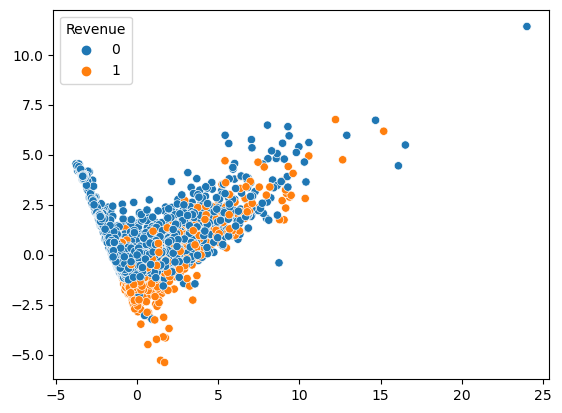

In [16]:
X0_range = (X_train_pca[:,0].min(), X_train_pca[:,0].max())
X1_range = (X_train_pca[:,1].min(), X_train_pca[:,1].max())

sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=y_train, marker='o')
#sns.scatterplot(X_test_pca[:,0], X_test_pca[:,1], hue=y_test, marker='^')


## Hierarchical clustering

### Agglomerative clustering

In [17]:
model_agglomerative = AgglomerativeClustering(n_clusters=n_clusters, affinity=element_distance_metric, linkage=linkage)
labels_agglomerative = model_agglomerative.fit_predict(X_train_pca)


In [18]:
metrics_agglomerative = get_cluster_metrics(labels_agglomerative,y_train,'Agglomerative')
metrics_agglomerative

,Accuracy,p_00,p_01,p_10,p_11,r_00,r_01,r_10,r_11,p_0,p_1,tot_purity,jaccard
Agglomerative,0.706207,0.86959,0.13041,0.77011,0.22989,0.767004,0.232996,0.623178,0.376822,0.86959,0.77011,0.844183,0.166564


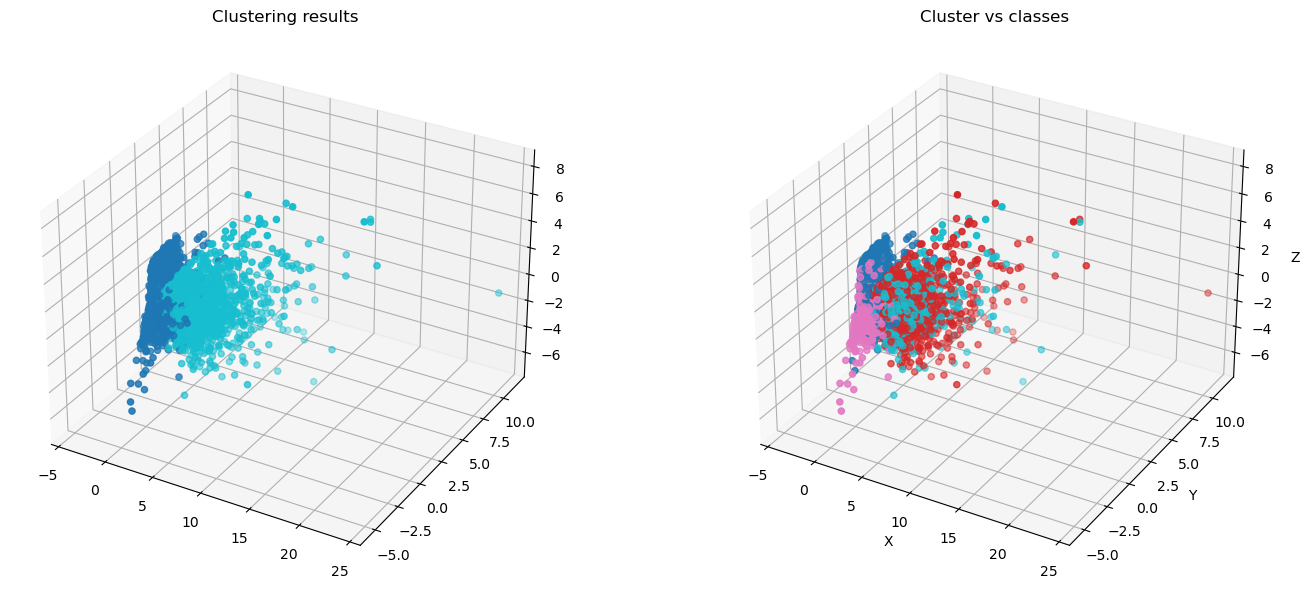

In [19]:
purity_vs_jaccard_plot(X_train_scaled.to_numpy(),labels_agglomerative,y_train)

|             | Class 0   | Class 1   |
|-------------|---------:|---------:|
| Cluster 0   | Red     | Blue      |
| Cluster 1   | Light blue      | Pink      | 

## K-means

In [20]:
model_kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)             
labels_kmeans = model_kmeans.fit_predict(X_train_pca)

In [21]:
metrics_kmeans = get_cluster_metrics(labels_kmeans,y_train,'K-means')
metrics_kmeans

,Accuracy,p_00,p_01,p_10,p_11,r_00,r_01,r_10,r_11,p_0,p_1,tot_purity,jaccard
K-means,0.778979,0.866463,0.133537,0.71769,0.28231,0.872678,0.127322,0.728661,0.271339,0.866463,0.71769,0.844183,0.160575


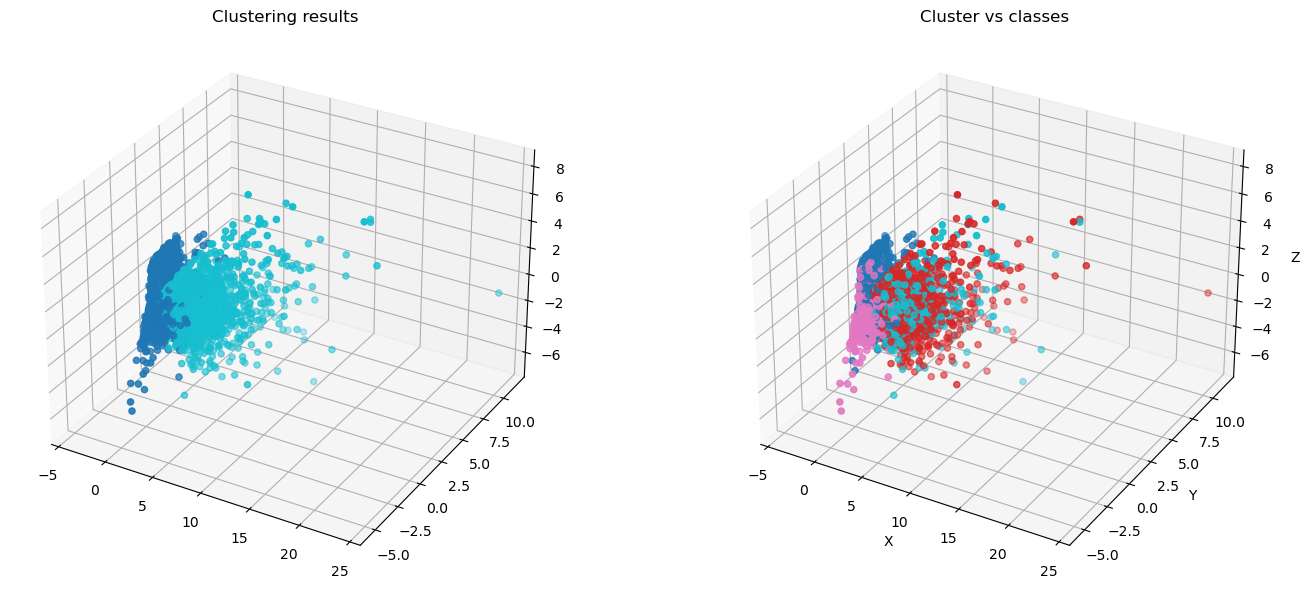

In [22]:
purity_vs_jaccard_plot(X_train_scaled.to_numpy(),labels_agglomerative,y_train)

|             | Class 0   | Class 1   |
|-------------|---------:|---------:|
| Cluster 0   | Red     | Blue      |
| Cluster 1   | Light blue      | Pink      | 

## DBSCAN

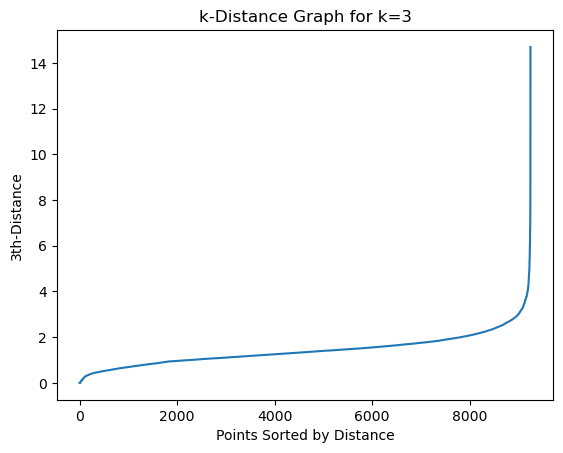

In [23]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X=X_train_pca

# Calculate the distance to the k-th nearest neighbor
from sklearn.neighbors import NearestNeighbors

# Set the value of k (number of nearest neighbors to consider)
k = 3

# Compute the distance to the k-th nearest neighbor for each data point
neigh = NearestNeighbors(n_neighbors=k)
distances, _ = neigh.fit(X).kneighbors(X)

# Sort the distances and plot the k-distance graph
distances = np.sort(distances[:, -1])  # Take the distance to the k-th nearest neighbor
plt.plot(np.arange(len(distances)), distances)
plt.xlabel('Points Sorted by Distance')
plt.ylabel(f'{k}th-Distance')
plt.title(f'k-Distance Graph for k={k}')
plt.show();


In [24]:
model_DBSCAN = DBSCAN(eps=4, min_samples=3)
labels_DBSCAN = model_DBSCAN.fit_predict(X_train_pca)

In [25]:
metrics_DBSCAN = get_cluster_metrics(labels_DBSCAN[labels_DBSCAN!=-1],y_train[labels_DBSCAN!=-1],'DBSCAN')
metrics_DBSCAN

,Accuracy,p_00,p_01,p_10,p_11,r_00,r_01,r_10,r_11,p_0,p_1,tot_purity,jaccard
DBSCAN,0.844683,0.844959,0.155041,1.0,0.0,0.999614,0.000386,1.0,0.0,0.844959,1.0,0.845009,0.0


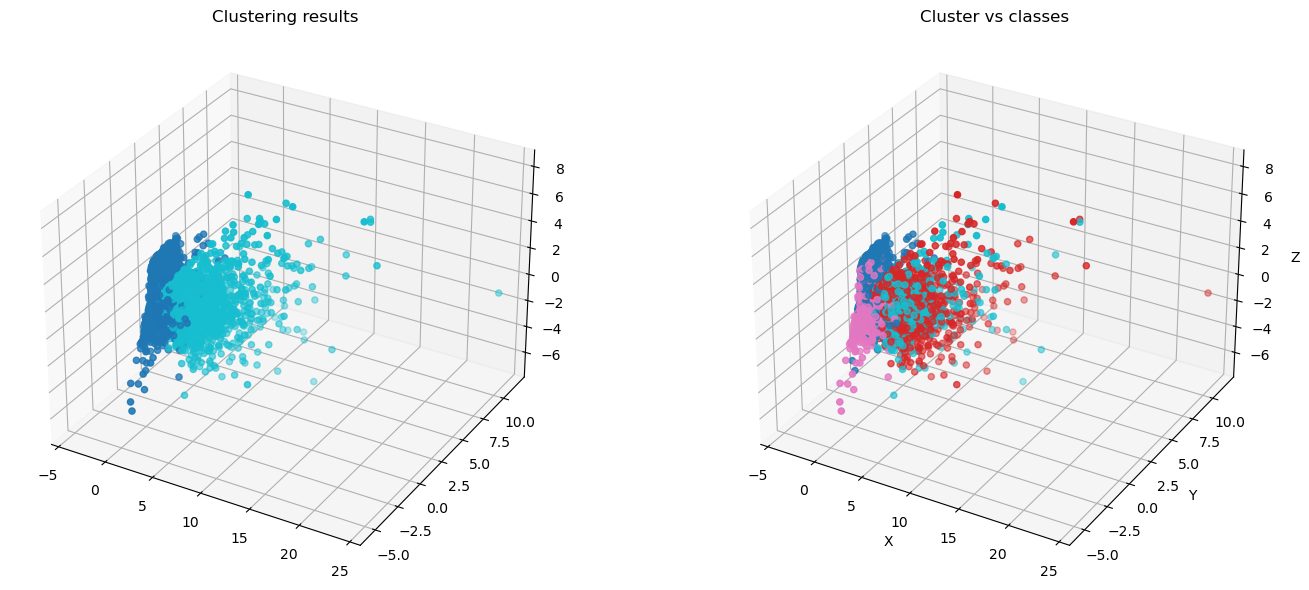

In [26]:
purity_vs_jaccard_plot(X_train_scaled.to_numpy(),labels_agglomerative,y_train)

|             | Class 0   | Class 1   |
|-------------|---------:|---------:|
| Cluster 0   | Red     | Blue      |
| Cluster 1   | Light blue      | Pink      | 

## Comparison between the algorithms

In [27]:
metrics_df = pd.DataFrame()
metrics_df = pd.concat([metrics_agglomerative,metrics_kmeans,metrics_DBSCAN],axis=0)
metrics_df

,Accuracy,p_00,p_01,p_10,p_11,r_00,r_01,r_10,r_11,p_0,p_1,tot_purity,jaccard
Agglomerative,0.706207,0.869590,0.130410,0.77011,0.22989,0.767004,0.232996,0.623178,0.376822,0.869590,0.77011,0.844183,0.166564
K-means,0.778979,0.866463,0.133537,0.71769,0.28231,0.872678,0.127322,0.728661,0.271339,0.866463,0.71769,0.844183,0.160575
DBSCAN,0.844683,0.844959,0.155041,1.00000,0.00000,0.999614,0.000386,1.000000,0.000000,0.844959,1.00000,0.845009,0.000000


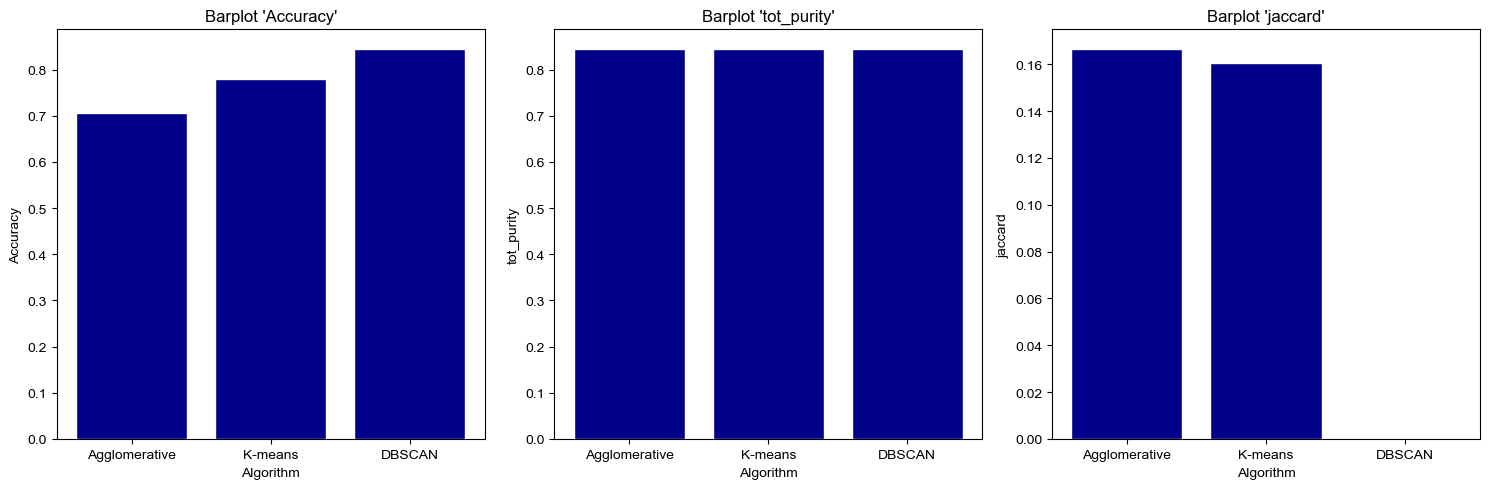

In [28]:
columns = ['Accuracy', 'tot_purity', 'jaccard']

num_cols = len(columns)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(15, 5))

sns.set_style('whitegrid')
palette = 'Set2'

for i, col in enumerate(columns):
    values = metrics_df.loc[:,col]
    axes[i].bar(metrics_df.index, values, color="darkblue")
    axes[i].set_title(f"Barplot '{col}'")
    axes[i].set_xlabel('Algorithm')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show();


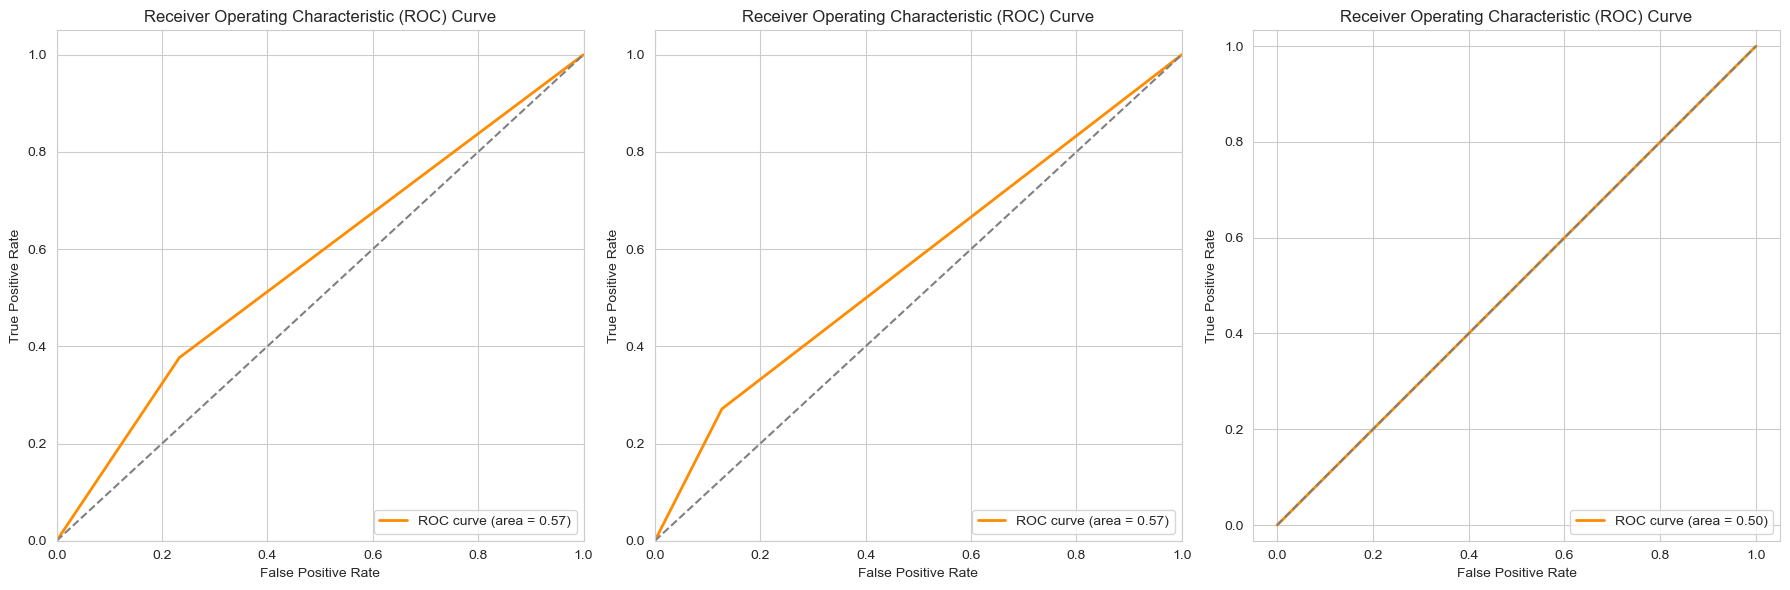

In [29]:
plt.figure(figsize=(18, 6))
# Primo subplot
ax1 = plt.subplot(1, 3, 1)
plot_roc_curve_clustering(y_train.to_numpy(), labels_agglomerative, ax1)

# Secondo subplot
ax2 = plt.subplot(1, 3, 2)
plot_roc_curve_clustering(y_train.to_numpy(), labels_kmeans, ax2)

# Terzo subplot
ax3 = plt.subplot(1, 3, 3)
plot_roc_curve_clustering(y_train.to_numpy(), labels_DBSCAN, ax3)

# Imposta i grafici come quadrati
plt.axis('equal')

# Spaziatura tra i subplot per evitare sovrapposizioni
plt.tight_layout()

# Visualizza i grafici
plt.show();